# Overview

This is a notebook with the problem set for lecture 3/5. I'll try and give enough detail so that the code can be run independently.

In [1]:
import numpy as np
from random_utils import *
import matplotlib.pyplot as plt
from mesh import Mesh
from beam import Beam

## Problem 1

![Problem Diagram](figures/Problem_1.png)



In [2]:
# Initialize mesh

mesh = Mesh(6)

N = 7

x = np.linspace(0, 25, N)
y = np.linspace(0, 50, N)
z = np.linspace(0, 37, N)

bf = np.array([0.05, -0.1, 0.23, 0.1, -0.025, -0.08])

mesh.add_node(0, np.array([0, 0, 0]), bc=np.zeros(6))
mesh.add_node(N-1, np.array([x[-1], y[-1], z[-1]]), bc=np.full(6, np.nan), bf=bf)

for i in range(1, N-1):
    mesh.add_node(
        i, 
        pos=np.array([x[i], y[i], z[i]]),
        bc=np.full(6, np.nan)
    )

In [3]:
r = 1
E = 10000
v = 0.3
A = np.pi * r**2
Iy = np.pi * r**4/4
Iz = Iy
J = Iy + Iz

beam = Beam(E=E, A=A, Iy=Iy, Iz=Iz, J=J, v=v, y=np.array([0, 1, 0]))

for i in range(N-1):
    mesh.add_element(beam, i, i+1)

In [4]:
x, f = mesh.solve()

print(f'Node 0 Reaction Force: {f[0:3]}')
print(f'Node 0 Reaction Moment: {f[3:6]}')
print(f'Node 3 Displacement: {x[6*3:6*3+3]}')
print(f'Node 3 Rotation: {x[6*3+3:6*3+6]}')
print(f'Node 6 Displacement: {x[6*6:6*6+3]}')
print(f'Node 6 Rotation: {x[6*6+3:6*6+6]}')

Node 0 Reaction Force: [-0.05  0.1  -0.23]
Node 0 Reaction Moment: [-15.3     3.925   5.08 ]
Node 3 Displacement: [ 0.09728798 -0.61719912  0.768455  ]
Node 3 Rotation: [ 0.04906668 -0.01261415 -0.01636342]
Node 6 Displacement: [ 0.31391228 -1.97997018  2.46380701]
Node 6 Rotation: [ 0.06569864 -0.01690624 -0.02205752]


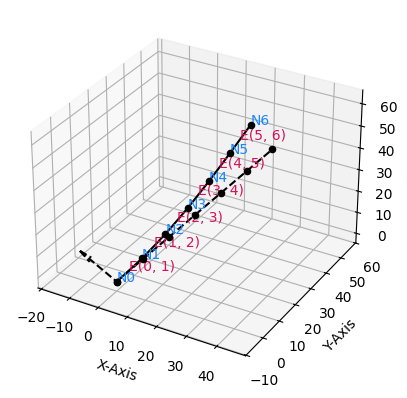

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mesh.plot(ax, disp_scale=10)
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
set_axes_equal(ax)

## Problem 2

![Problem Diagram](figures/Problem_2.png)

In [6]:
# Initialize mesh

mesh = Mesh(6)

N = 7

x = np.linspace(0, 25, N)
y = np.linspace(0, 50, N)
z = np.linspace(0, 37, N)

L = np.sqrt( x[-1]**2 + y[-1]**2 + z[-1]**2 )

P = -1

Fx = P * x[-1]/L
Fy = P * y[-1]/L
Fz = P * z[-1]/L

bf = np.array([Fx, Fy, Fz, 0, 0, 0])

mesh.add_node(0, np.array([0, 0, 0]), bc=np.zeros(6))
mesh.add_node(N-1, np.array([x[-1], y[-1], z[-1]]), bc=np.full(6, np.nan), bf=bf)

for i in range(1, N-1):
    mesh.add_node(
        i, 
        pos=np.array([x[i], y[i], z[i]]),
        bc=np.full(6, np.nan)
    )

In [7]:
r = 1
E = 10000
v = 0.3
A = np.pi * r**2
Iy = np.pi * r**4/4
Iz = Iy
J = Iy + Iz

beam = Beam(E=E, A=A, Iy=Iy, Iz=Iz, J=J, v=v, y=np.array([0, 1, 0]))

for i in range(N-1):
    mesh.add_element(beam, i, i+1)

In [8]:
x, f = mesh.solve()

print(f'Node 0 Reaction Force: {f[0:3]}')
print(f'Node 0 Reaction Moment: {f[3:6]}')
print(f'Node 3 Displacement: {x[6*3:6*3+3]}')
print(f'Node 3 Rotation: {x[6*3+3:6*3+6]}')
print(f'Node 6 Displacement: {x[6*6:6*6+3]}')
print(f'Node 6 Rotation: {x[6*6+3:6*6+6]}')

Node 0 Reaction Force: [0.3729267  0.74585339 0.55193151]
Node 0 Reaction Moment: [ 2.12260765e-14 -3.63523369e-14  3.05935832e-14]
Node 3 Displacement: [-0.00039789 -0.00079577 -0.00058887]
Node 3 Rotation: [ 0.00000000e+00  8.66104284e-17 -3.74700271e-16]
Node 6 Displacement: [-0.00079577 -0.00159155 -0.00117775]
Node 6 Rotation: [-1.87350135e-15  1.04218223e-16 -1.66533454e-16]


In [9]:
eigval, eigvec = mesh.global_eigenmode_study(Beam.beam_buckling_eigenmatrix)
print(f'Critical Load Factor: {np.real(eigval[0])}')

Critical Load Factor: 4.3122049198692345


## Problem 3

![Problem Diagram](figures/Problem_3.png)

In [10]:
mesh = Mesh(6)

L1 = 11
L2 = 23
L3 = 15
L4 = L3 + 13

extf = np.array([0, 0, -1, 0, 0, 0])

mesh.add_node(0, np.array([0, 0, 0]), np.zeros(6))
mesh.add_node(1, np.array([L1, 0, 0]), np.zeros(6))
mesh.add_node(2, np.array([L1, L2, 0]), np.zeros(6))
mesh.add_node(3, np.array([0, L2, 0]), np.zeros(6))

mesh.add_node(4, np.array([0, 0, L3]), np.full(6, np.nan))
mesh.add_node(5, np.array([L1, 0, L3]), np.full(6, np.nan))
mesh.add_node(6, np.array([L1, L2, L3]), np.full(6, np.nan))
mesh.add_node(7, np.array([0, L2, L3]), np.full(6, np.nan))

mesh.add_node(8, np.array([0, 0, L4]), np.full(6, np.nan), bf=extf)
mesh.add_node(9, np.array([L1, 0, L4]), np.full(6, np.nan), bf=extf)
mesh.add_node(10, np.array([L1, L2, L4]), np.full(6, np.nan), bf=extf)
mesh.add_node(11, np.array([0, L2, L4]), np.full(6, np.nan), bf=extf)

In [11]:
Ea = 10000
va = 0.3
r=1
Aa = np.pi*r**2
Iya = np.pi*r**4/4
Iza = np.pi*r**4/4
Ja = Iya + Iza

beam_a = Beam(E=Ea, A=Aa, Iy=Iya, Iz=Iza, J=Ja, v=va, y=np.array([0, 1, 0]))

Eb = 50000
vb = 0.3
b = 0.5
h = 1
Ab = b*h
Iyb = b**3 * h / 12
Izb = b * h**3 / 12
Jb = Iyb + Izb

beam_bx = Beam(E=Eb, A=Ab, Iy=Iyb, Iz=Izb, J=Jb, v=vb, y=np.array([0, 1, 0]))
beam_by = Beam(E=Eb, A=Ab, Iy=Iyb, Iz=Izb, J=Jb, v=vb, y=np.array([1, 0, 0]))

In [12]:
mesh.add_element(beam_a, 0, 4)
mesh.add_element(beam_a, 1, 5)
mesh.add_element(beam_a, 2, 6)
mesh.add_element(beam_a, 3, 7)

mesh.add_element(beam_a, 4, 8)
mesh.add_element(beam_a, 5, 9)
mesh.add_element(beam_a, 6, 10)
mesh.add_element(beam_a, 7, 11)

In [13]:
mesh.add_element(beam_bx, 4, 5)
mesh.add_element(beam_bx, 7, 6)
mesh.add_element(beam_bx, 8, 9)
mesh.add_element(beam_bx, 11, 10)

mesh.add_element(beam_by, 4, 7)
mesh.add_element(beam_by, 5, 6)
mesh.add_element(beam_by, 8, 11)
mesh.add_element(beam_by, 9, 10)

In [14]:
x, f = mesh.solve()

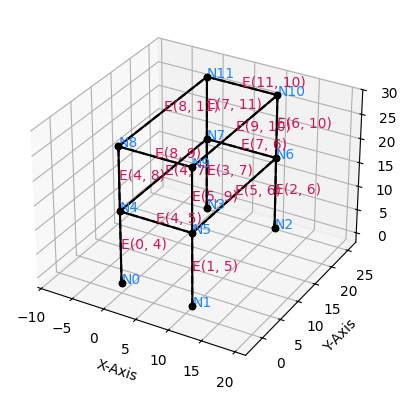

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mesh.plot(ax, disp_scale=10)
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
set_axes_equal(ax)

In [16]:
eigval, eigvec = mesh.global_eigenmode_study(Beam.beam_buckling_eigenmatrix)
print(f'Critical Load Factor: {np.real(eigval[0])}')

Critical Load Factor: 39.21873716203877


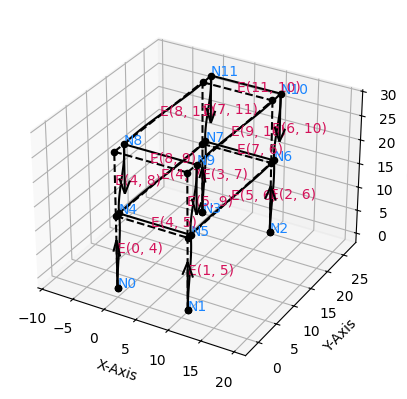

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mesh.plot_displacement(ax, eigvec[:, 0], disp_scale=5, force_scale=10)
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
set_axes_equal(ax)